In [154]:
# imports
import os
import hydra
from omegaconf import DictConfig
from datetime import datetime
from typing import Union
import cv2
import numpy as np
import scipy.signal as ss

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# import bag reader and processor modules
from bag_reader.bag_reader import BagReader
from bag_processor import DepthHandler, ImageHandler
dp = DepthHandler()
ih = ImageHandler()



In [155]:
line = np.load('/home/nimibot/catkin_ws/src/ros_env_prediction/env_recorder_pkg/bag/2022-12-12-15-24-09/plots/feature/plot_170.npy')

In [156]:
line[1].min()

0.779

In [157]:
subtracted = np.subtract(line[1][1:],line[1][:-1])
subtracted = np.concatenate([[0],subtracted])
subtracted_abs = np.abs(subtracted)
id_max = np.argmax(subtracted_abs)
#print(subtracted)
print(np.max(subtracted_abs))
print(np.min(subtracted_abs))
print(subtracted.mean())
print(id_max)

0.12799996137619019
0.0
-0.0010166668229632907
186


In [158]:
df = pd.DataFrame(line[1].tolist())
df.head()

,0
0,1.243
1,1.246
2,1.247
3,1.250
4,1.252


In [159]:
df_sub = pd.DataFrame(subtracted.tolist())
df_sub.head()

,0
0,0.000
1,0.003
2,0.001
3,0.003
4,0.002


In [160]:
df.describe()

,0
count,360.000000
mean,0.977842
std,0.154470
min,0.779000
25%,0.870000
50%,0.912000
75%,1.069250
max,1.309000


In [183]:
peaks_line, properties_line = ss.find_peaks(line[1],distance=10)
peaks_sub, properties_sub = ss.find_peaks(subtracted,distance=20)
#properties_line["prominences"], properties_line["widths"]


In [186]:
peaks_line

array([ 11,  22,  33,  61,  72, 174, 185, 215, 248, 303, 328])

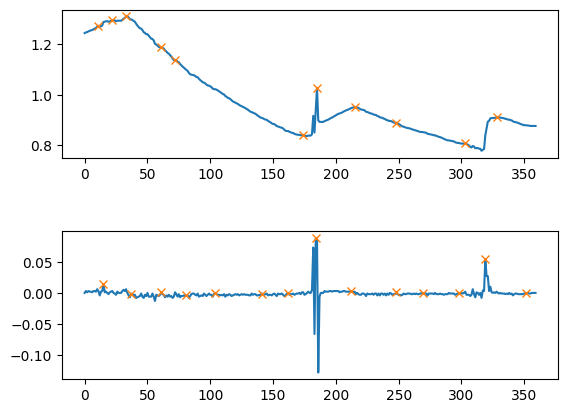

In [182]:
fig, (ax1, ax2) = plt.subplots(2, 1)
# make a little extra space between the subplots
fig.subplots_adjust(hspace=0.5)




ax1.plot(line[0],line[1])
ax1.plot(peaks_line,line[1][peaks_line],"x")
# ax1.vlines(x=peaks_line, ymin=line[1][peaks_line] - properties_line["prominences"],
#            ymax = line[1][peaks_line], color = "C1")
# ax1.hlines(y=properties_line["widths"], xmin=properties_line["left_ips"],
#            xmax=properties_line["right_ips"], color = "C1")
ax2.plot(line[0],subtracted)
ax2.plot(peaks_sub,subtracted[peaks_sub],"x")



plt.show()

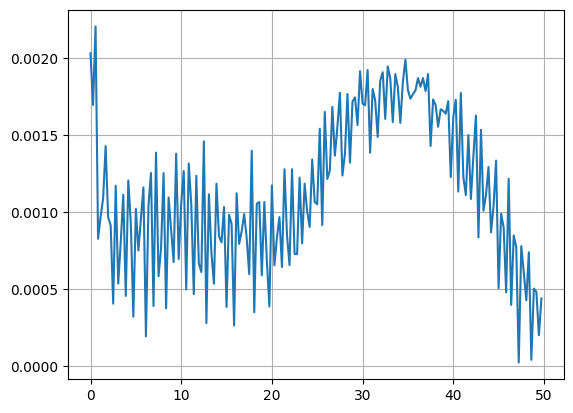

In [163]:
from scipy.fft import fft, fftfreq
# Number of sample points
#N = len(line[1])
N= len(subtracted)
# sample spacing
T = 1.0 /100
x = range(N)
#y = line[1]
y=subtracted
yf = fft(y)
xf = fftfreq(N, T)[:N//2]
import matplotlib.pyplot as plt
plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
plt.grid()
plt.show()